In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

As always, let's start with reading in the data.

In [2]:
df = pd.read_csv('tutti_frutti_data.csv', index_col=0)
df.head(3)

,green_butterflies,green_frogs,green_snails,yellow_butterflies,yellow_frogs,yellow_snails,red_butterflies,red_frogs,red_snails
sample_id,,,,,,,,,
1,2,2,4,0,3,1,2,2,2
2,3,2,4,1,4,1,2,1,2
3,4,0,1,2,3,2,2,2,3


Since I'm going to use proportions in my analysis, let's calculate the size of each sample so that we can calculate the proportions. I store the sample sizes in a series so I can easily use it in the division calculation.

In [3]:
sample_totals = df.sum(axis=1)

df_proportions = df.div(sample_totals, axis=0)
df_proportions.head(3)

,green_butterflies,green_frogs,green_snails,yellow_butterflies,yellow_frogs,yellow_snails,red_butterflies,red_frogs,red_snails
sample_id,,,,,,,,,
1,0.111111,0.111111,0.222222,0.000000,0.166667,0.055556,0.111111,0.111111,0.111111
2,0.150000,0.100000,0.200000,0.050000,0.200000,0.050000,0.100000,0.050000,0.100000
3,0.210526,0.000000,0.052632,0.105263,0.157895,0.105263,0.105263,0.105263,0.157895


Then let's see how the descriptive data for each type of candy looks like. Since we're doing a hypothesis test, the mean and standard deviation are the most "interesting" at the moment.

In [4]:
df_proportions.describe()

,green_butterflies,green_frogs,green_snails,yellow_butterflies,yellow_frogs,yellow_snails,red_butterflies,red_frogs,red_snails
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.106463,0.096918,0.102128,0.110242,0.099303,0.094238,0.127975,0.147571,0.115162
std,0.076527,0.056870,0.087903,0.092238,0.070182,0.062745,0.079369,0.095070,0.055025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050658,0.053363,0.052632,0.052632,0.052632,0.052632,0.066667,0.057292,0.071875
50%,0.108187,0.102632,0.058824,0.080409,0.105263,0.057190,0.111111,0.153947,0.111111
75%,0.155921,0.147833,0.157895,0.164474,0.141912,0.116013,0.164474,0.207895,0.157895
max,0.300000,0.222222,0.350000,0.333333,0.333333,0.250000,0.315789,0.388889,0.210526


Let's also visualise the distributions of the proportions for each type of candy.

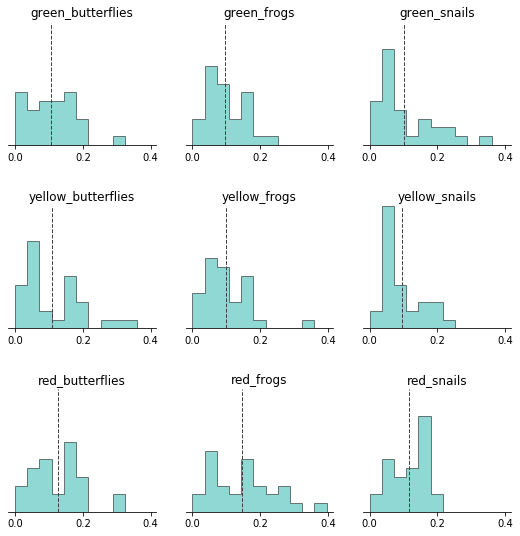

In [5]:
nrows = 3; ncols = 3
num_plots = nrows*ncols

fig = plt.figure(figsize=(9, 9))
axes = [plt.subplot(nrows,ncols,i) for i in range(1,num_plots+1)]

plt.subplots_adjust(wspace=.2, hspace=.5)

for i, col in enumerate(df_proportions.columns):
    ax = axes[i]
    ax.hist(df_proportions[col], 
            bins=np.arange(0, .4, .036),
            color='lightseagreen', histtype='stepfilled', alpha=.5, ec="k")
    ax.axvline(df_proportions[col].mean(), color='#404040', linestyle='dashed', linewidth=1)
    
    ax.set_title(col)
    ax.set_ylim(0, 14)
    
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_yaxis().set_visible(False)    

So far we can see that the mean for red frogs (14.8%) is the most further away from the expected value (1/9 or 11.11%). Let's now do a proper t-test to see if that is a significant difference.

In [6]:
pop_mean = 1/9
alpha = 0.05

for col in df_proportions.columns[:9]:
    result = scipy.stats.ttest_1samp(df_proportions[col], pop_mean)
    if result[1] < alpha:
        print(f'Reject the null for {col}: t {result[0].round(4)}, p {result[1].round(4)}')
    else:
        print(f'Fail to reject the null for {col}: t {result[0].round(4)}, p {result[1].round(4)}')

Fail to reject the null for green_butterflies: t -0.3327, p 0.7417
Fail to reject the null for green_frogs: t -1.367, p 0.1821
Fail to reject the null for green_snails: t -0.5597, p 0.58
Fail to reject the null for yellow_butterflies: t -0.0516, p 0.9592
Fail to reject the null for yellow_frogs: t -0.9215, p 0.3644
Fail to reject the null for yellow_snails: t -1.473, p 0.1515
Fail to reject the null for red_butterflies: t 1.1638, p 0.254
Reject the null for red_frogs: t 2.1006, p 0.0445
Fail to reject the null for red_snails: t 0.4032, p 0.6897


And indeed we can see that we can reject the null hypothesis for red frogs and conclude that there are more red frogs (M = 14.8%, SD = 9.5%) than the population norm 11.1%, t(29) = 2.1006, p = .0445.

Let's also do the same analysis for each colour and each shape as well.

First, I need a slightly modified data set. I start by creating an empty data frame and add columns which are just the respective columns summed up from the original data.

In [7]:
df_agg = pd.DataFrame()
cols = ['green', 'yellow', 'red', 'butterflies', 'frogs', 'snails']

for col in cols:
    df_agg[col] = df[[i for i in df.columns if col in i]].sum(axis=1)
    
df_agg.head(3)

,green,yellow,red,butterflies,frogs,snails
sample_id,,,,,,
1,8,4,6,4,7,7
2,9,6,5,6,7,7
3,5,7,7,8,5,6


I use the same series with sample sizes to get the proportions.

In [8]:
df_agg_proportions = df_agg.div(sample_totals, axis=0)
df_agg_proportions.head(3)

,green,yellow,red,butterflies,frogs,snails
sample_id,,,,,,
1,0.444444,0.222222,0.333333,0.222222,0.388889,0.388889
2,0.450000,0.300000,0.250000,0.300000,0.350000,0.350000
3,0.263158,0.368421,0.368421,0.421053,0.263158,0.315789


Then let's also see the descriptive stats on these categories as well.

In [9]:
df_agg_proportions.describe()

,green,yellow,red,butterflies,frogs,snails
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.305509,0.303783,0.390709,0.344680,0.343793,0.311528
std,0.103636,0.097211,0.101600,0.123761,0.097122,0.088734
min,0.105263,0.105263,0.166667,0.111111,0.210526,0.157895
25%,0.222222,0.229167,0.315789,0.263158,0.263158,0.238971
50%,0.285948,0.315789,0.421053,0.334365,0.315789,0.315789
75%,0.388889,0.373355,0.473684,0.421053,0.388889,0.364551
max,0.473684,0.444444,0.611111,0.555556,0.611111,0.500000


And the visualisation.

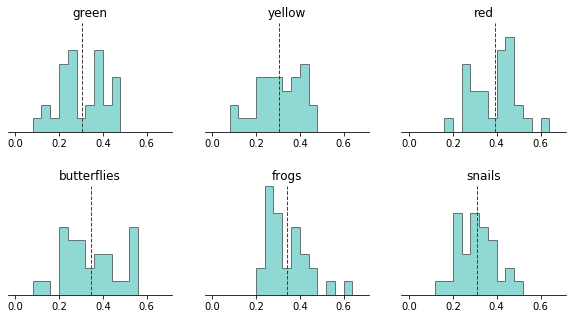

In [10]:
nrows = 2; ncols = 3
num_plots = nrows*ncols

fig = plt.figure(figsize=(10, 5))
axes = [plt.subplot(nrows,ncols,i) for i in range(1,num_plots+1)]

plt.subplots_adjust(wspace=.2, hspace=.5)

for i, col in enumerate(df_agg_proportions.columns):
    ax = axes[i]
    ax.hist(df_agg_proportions[col], 
            bins=np.arange(0, .7, .04),
            color='lightseagreen', histtype='stepfilled', alpha=.5, ec="k")
    ax.axvline(df_agg_proportions[col].mean(), color='#404040', linestyle='dashed', linewidth=1)
    
    ax.set_title(col)
    ax.set_ylim(0, 8)
    
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_yaxis().set_visible(False)

The mean proportion of reds (39.1%) seems to be quite a bit higher than expected (1/3 or 33.33%). From the graphs as well, we can see that the distribution is shifted to the left, compared to greens and yellows.
The distributions of the shapes seem to be even, but of course, let the t-test speak for itself.

In [11]:
pop_mean = 1/3
alpha = 0.05
    
for col in df_agg_proportions.columns:
    result = scipy.stats.ttest_1samp(df_agg_proportions[col], pop_mean)
    if result[1] < alpha:
        print(f'Reject the null for {col}: t {result[0].round(4)}, p {result[1].round(4)}')
    else:
        print(f'Fail to reject the null for {col}: t {result[0].round(4)}, p {result[1].round(4)}')

Fail to reject the null for green: t -1.4705, p 0.1522
Fail to reject the null for yellow: t -1.665, p 0.1067
Reject the null for red: t 3.0931, p 0.0044
Fail to reject the null for butterflies: t 0.5021, p 0.6194
Fail to reject the null for frogs: t 0.5899, p 0.5599
Fail to reject the null for snails: t -1.346, p 0.1887


And indeed, we can conclude that there are more red coloured Tutti Fruttis (M = 39.1%, SD = 10.2%) than others, t(29) = 3.0931, p = 0.0044.
By shape, there is no significant difference in the distributions so we can conclude that they are distributed evenly.